Analysis done working through tutorial at:


https://pv-tutorials.github.io/2024_PVSC/Tutorial%201%20-%20TMY%20Weather%20Data.html

In [126]:
import pvlib
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
# Open weather data from an epw file
# Downloaded from https://re.jrc.ec.europa.eu/pvg_tools/en/
# See user manual at https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis/getting-started-pvgis/pvgis-user-manual_en
df, metadata = pvlib.iotools.read_epw('data/tmy_51.483_-1.714_2005_2023.epw')
metadata

{'loc': 'LOCATION',
 'city': 'unknown',
 'state-prov': '-',
 'country': 'unknown',
 'data_type': 'ECMWF/ERA',
 'WMO_code': 'unknown',
 'latitude': 51.483,
 'longitude': -1.714,
 'TZ': 0.0,
 'altitude': 166.0}

In [130]:
# the data contains a row for every hour of the year the index currently shows with true year the data was recorded
# this is because the TMY takes the [median?] of the data since 2005 to 2023
# to ease data visualisation I will overried the index year value to a dummy of 2024
df.index = df.index.map(lambda x: x.replace(year=2024))
df.index = df.index + pd.Timedelta(hours=1)
df.tail()


,year,month,day,hour,minute,data_source_unct,temp_air,temp_dew,relative_humidity,atmospheric_pressure,...,ceiling_height,present_weather_observation,present_weather_codes,precipitable_water,aerosol_optical_depth,snow_depth,days_since_last_snowfall,albedo,liquid_precipitation_depth,liquid_precipitation_quantity
2024-12-31 20:00:00+00:00,2018,12,31,20,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,7.18,4.67,84.09,101310.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-12-31 21:00:00+00:00,2018,12,31,21,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.89,4.33,83.76,101300.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-12-31 22:00:00+00:00,2018,12,31,22,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.59,3.98,83.44,101270.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-12-31 23:00:00+00:00,2018,12,31,23,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.30,3.64,83.12,101250.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2025-01-01 00:00:00+00:00,2018,12,31,24,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,6.00,3.29,82.79,97580.0,...,99999,9,999999999,999,0.999,999,99,999,999,99


In [131]:
display(df.keys())
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Index(['year', 'month', 'day', 'hour', 'minute', 'data_source_unct',
       'temp_air', 'temp_dew', 'relative_humidity', 'atmospheric_pressure',
       'etr', 'etrn', 'ghi_infrared', 'ghi', 'dni', 'dhi', 'global_hor_illum',
       'direct_normal_illum', 'diffuse_horizontal_illum', 'zenith_luminance',
       'wind_direction', 'wind_speed', 'total_sky_cover', 'opaque_sky_cover',
       'visibility', 'ceiling_height', 'present_weather_observation',
       'present_weather_codes', 'precipitable_water', 'aerosol_optical_depth',
       'snow_depth', 'days_since_last_snowfall', 'albedo',
       'liquid_precipitation_depth', 'liquid_precipitation_quantity'],
      dtype='object')

Number of rows: 8760
Number of columns: 35


In [132]:
# ghi, dhi, dni are irradiance measurements, temp_air is the air temperature, and wind_speed is the wind speed.
df = df[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
df.columns = ['GHI', 'DHI', 'DNI', 'Temperature', 'Wind Speed']

# show the first 15 rows:
df.head(15)

,GHI,DHI,DNI,Temperature,Wind Speed
2024-01-01 01:00:00+00:00,0.0,0.0,-0.00,5.71,5.0
2024-01-01 02:00:00+00:00,0.0,0.0,-0.00,5.41,5.3
2024-01-01 03:00:00+00:00,0.0,0.0,-0.00,5.12,5.5
2024-01-01 04:00:00+00:00,0.0,0.0,-0.00,4.83,5.8
2024-01-01 05:00:00+00:00,0.0,0.0,-0.00,4.53,6.0
2024-01-01 06:00:00+00:00,0.0,0.0,-0.00,4.24,6.3
2024-01-01 07:00:00+00:00,0.0,0.0,-0.00,3.94,6.5
2024-01-01 08:00:00+00:00,0.0,0.0,-0.00,4.12,3.3
2024-01-01 09:00:00+00:00,22.0,22.0,0.00,4.35,2.8
2024-01-01 10:00:00+00:00,39.0,39.0,0.00,4.97,2.1


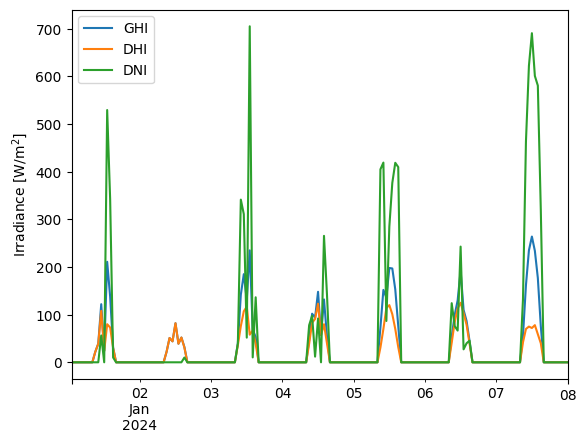

In [133]:
# Plotting the three irradiance fields

first_week = df.head(24*7) # Plotting 7 days, each one has 24 hours or entries
first_week[['GHI', 'DHI', 'DNI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

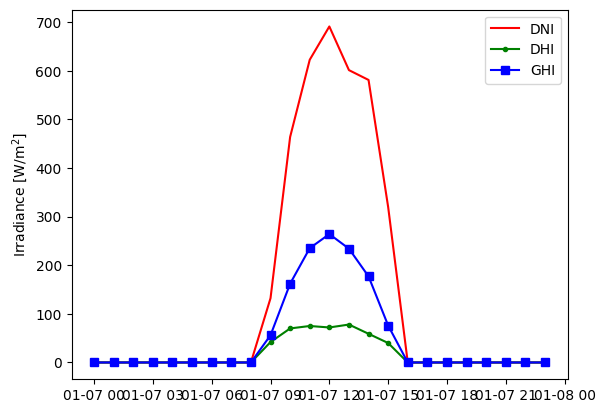

In [134]:
birthday = df.loc['2024-01-07':'2024-01-07']
plt.plot(birthday['DNI'], color='r') 
plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');
plt.legend(['DNI', 'DHI', 'GHI'])

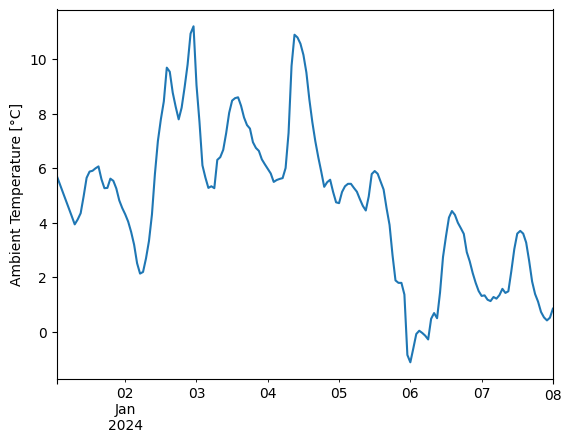

In [135]:
first_week['Temperature'].plot()
plt.ylabel('Ambient Temperature [°C]');

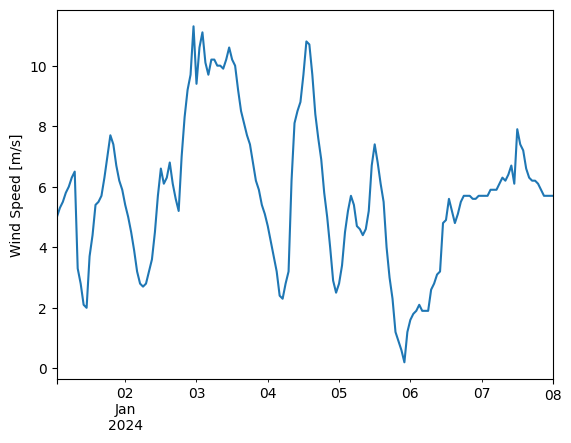

In [136]:
first_week['Wind Speed'].plot()
plt.ylabel('Wind Speed [m/s]');

In [137]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('M').sum()
monthly_ghi.head(12)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_8183/2694762132.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ghi = df['GHI'].resample('M').sum()


2024-01-31 00:00:00+00:00     23776.0
2024-02-29 00:00:00+00:00     38348.0
2024-03-31 00:00:00+00:00     74080.0
2024-04-30 00:00:00+00:00    149143.0
2024-05-31 00:00:00+00:00    131899.0
2024-06-30 00:00:00+00:00    177940.0
2024-07-31 00:00:00+00:00    147841.0
2024-08-31 00:00:00+00:00    128672.0
2024-09-30 00:00:00+00:00     99228.0
2024-10-31 00:00:00+00:00     51708.0
2024-11-30 00:00:00+00:00     30242.0
2024-12-31 00:00:00+00:00     20194.0
Freq: ME, Name: GHI, dtype: float64

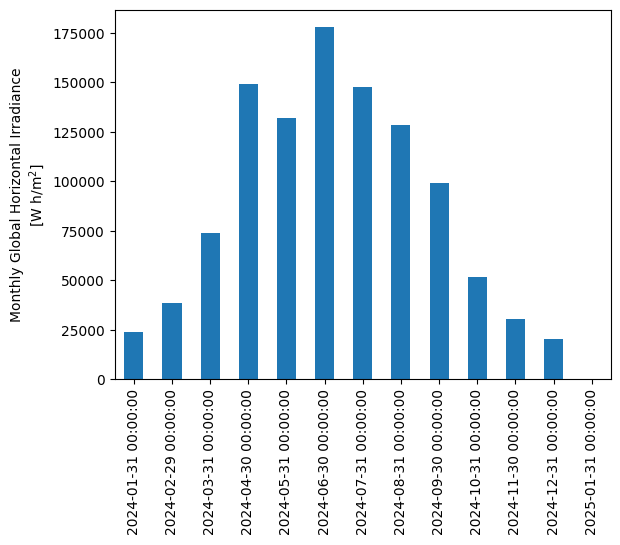

In [138]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_8183/371858129.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()


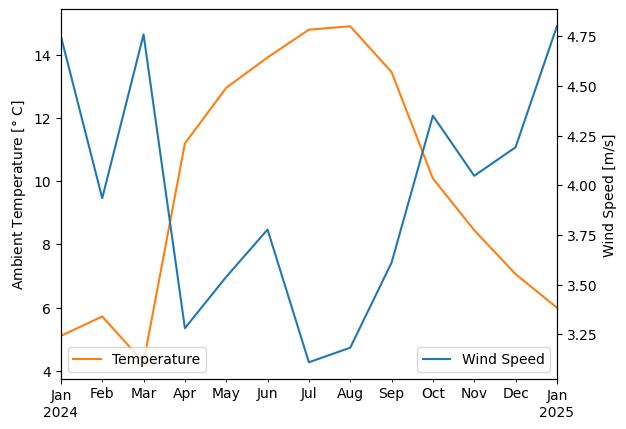

In [139]:
# Taking monthly averages instead of sums.

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()
monthly_average_temp_wind['Temperature'].plot(ax=ax1, c='tab:orange')
monthly_average_temp_wind['Wind Speed'].plot(ax=ax2, c='tab:blue')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_8183/969255432.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_DNI = df[['DNI']].resample('M').mean()  # Add the column name, and resample by day. Month is 'M', day is..


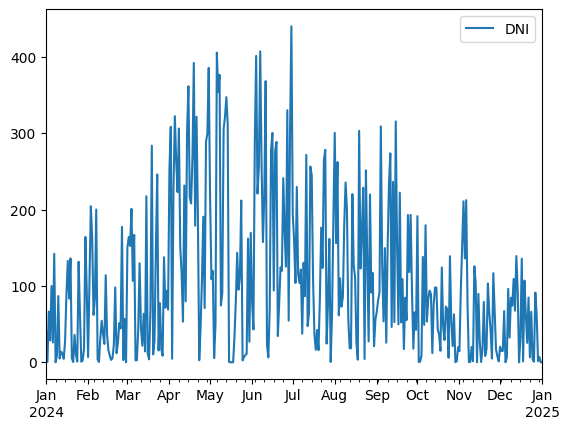

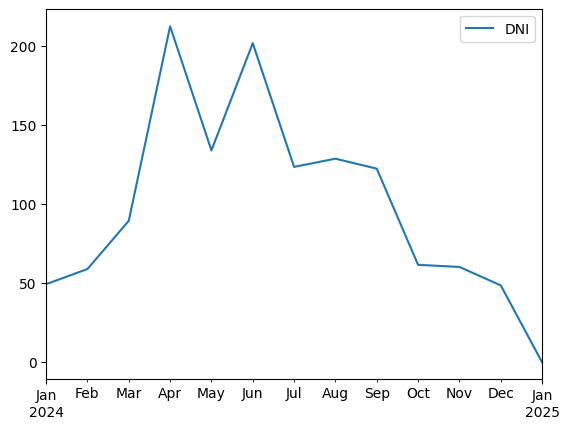

In [ ]:
# Average DNI by DAY and by MONTH

try:
    daily_average_DNI = df[['DNI']].resample('D').mean()
    monthly_average_DNI = df[['DNI']].resample('M').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
    monthly_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

## Calculate Sun Position ##

In [148]:
# make a Location object corresponding to this TMY
location = pvlib.location.Location(latitude=metadata['latitude'],
                                   longitude=metadata['longitude'])

# shift timestamps if necessary from the TMY file to match the solar position calculations
times = df.index - pd.Timedelta('49min')
solar_position = location.get_solarposition(times)
solar_position.index += pd.Timedelta('49min') # but remember to shift the index back to line up with the TMY data:

In [149]:
poas = {}  # Use a dictionary to store DataFrames for each tilt angle

for tilt in [10, 15, 20, 25, 30]:
    # Calculate the total irradiance for the given tilt angle
    poa = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,  # Tilt angle
        surface_azimuth=265,  # Facing South
        dni=df['DNI'],
        ghi=df['GHI'],
        dhi=df['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )
    
    # Store the resulting DataFrame in the dictionary with the tilt as the key
    poas[tilt] = poa

# Access individual DataFrames by tilt angle, e.g., poas[10] for tilt=10

In [ ]:
df = pd.DataFrame({
    'poa_10': df_poa1['poa_global'], 
    'poa_15': df_poa2['poa_global'], 
    'poa_20': df_poa3['poa_global'],
    'poa_30': df_poa4['poa_global'],
})
df_monthly = df.resample('M').sum()
df_monthly.plot.bar()
plt.ylabel('Monthly Insolation [W h/m$^2$]');

NameError: name 'df_poa2' is not defined